# Statistics

- ### Mean

In [1]:
x = [1,2,3,4,5,6,7,8,9] #values of independent variable
n = length(x) # number of x values
X = 0 #Sum of all x values
y = 0 #Mean 
# julia is 1-indexed so the index of first element is always 1
for i = 1:n
     X += i
end
y = X/n
println("Mean of x is : ",y)

Mean of x is : 5.0


- ### Median

In [2]:
x = [8, 5, 7, 10, 15, 21]
x = sort(x) #The values must always be sorted for finding median
n = length(x)
y = 0
if n%2 != 0
    y = x[div(n+1,2)] # We use function div for integer division
else
    y = (x[div(n,2)] + x[div(n+2,2)])/2
end
println("Median of x is : ",y)

Median of x is : 9.0


- ### Mode

In [3]:
x = [8, 5, 7, 10, 15, 21, 5, 7, 2, 5]
n = length(x)
y = 0
dict = Dict{Int8,Int8}()
for i = 1:n
    if haskey(dict,x[i])
        dict[x[i]] = dict[x[i]] + 1
    else
        get!(dict,x[i],1)
    end
end
println("Mode of x is : ",findmax(dict)[2]) # method-1
println("Mode of x is : ",reduce((x, y) -> dict[x] > dict[y] ? x : y, keys(dict))) # method-2

Mode of x is : 5
Mode of x is : 5


- ### Variance

In [4]:
x = [1,2,3]
n = length(x)
μ = sum(x)/n # mean
v=0
for i in x
    d = (i-μ)^2
    v += d
end
σ = sqrt(v/n)
println("Standard Deviation of x is : ",σ)
println("Variance of x is : ",σ^2)

Standard Deviation of x is : 0.816496580927726
Variance of x is : 0.6666666666666666


- ### Histogram

In [5]:
using Plots
plotly()
Plots.histogram(rand(50),bins=10)

<!DOCTYPE html>
 
 
 Plots.jl

- ### Line Plot

In [6]:
using Plots
plotly()
plot(rand(5,5),linewidth=2,title="My Plot")

<!DOCTYPE html>
 
 
 Plots.jl

## Probability

- ### Probability Density Function

3×8 DataFrame
│ Row │ variable │ mean    │ min │ median │ max  │ nunique │ nmissing │ eltype                   │
│     │ Symbol   │ Union…  │ Any │ Union… │ Any  │ Union…  │ Nothing  │ DataType                 │
├─────┼──────────┼─────────┼─────┼────────┼──────┼─────────┼──────────┼──────────────────────────┤
│ 1   │ Len      │ 18.8133 │ 4.2 │ 19.25  │ 33.9 │         │          │ Float64                  │
│ 2   │ Supp     │         │ OJ  │        │ VC   │ 2       │          │ CategoricalString{UInt8} │
│ 3   │ Dose     │ 1.16667 │ 0.5 │ 1.0    │ 2.0  │         │          │ Float64                  │

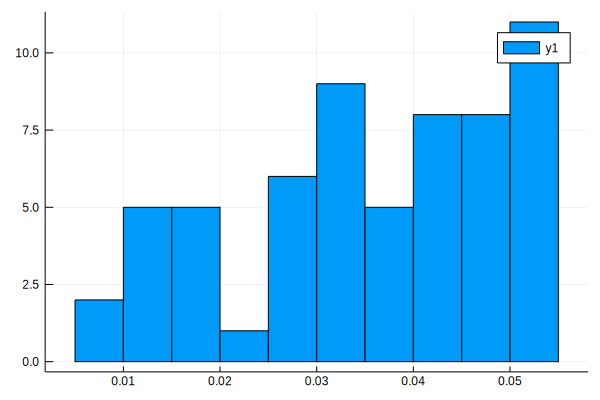

In [85]:
using Statistics,Distributions,RDatasets,DataFrames,Plots
df = dataset("datasets","ToothGrowth")
print(describe(df))
d = fit(Normal,df[!,:Len])
gr()
Plots.histogram(pdf.(d,df[!,:Len]),bins=10)

- ### Conditional Probability

In [8]:
using RDatasets,DataFrames,Query
df = last(dataset("datasets","Titanic"),10)
q1 = @from i in df begin
            @where i.Sex == "Female" && i.Class == "Crew"
            @select i.Sex
            @collect 
       end
q2 = @from i in df begin
            @where i.Class == "Crew"
            @select i.Class
            @collect 
       end

probFemale_Crew = length(q1)/length(q2)
println("Prob of Sex=Female|Class=Crew  ",probFemale_Crew)

p1 = @from i in df begin
            @where i.Sex == "Male" && i.Age == "Adult"
            @select i.Sex
            @collect 
       end
p2 = @from i in df begin
            @where i.Age == "Adult"
            @select i.Age
            @collect 
       end

probMale_Adult = length(p1)/length(p2)
println("Prob of Sex=Male|Age=Adult   ",probMale_Adult)

┌ Info: Precompiling Query [1a8c2f83-1ff3-5112-b086-8aa67b057ba1]
└ @ Base loading.jl:1192


Prob of Sex=Female|Class=Crew  0.6666666666666666
Prob of Sex=Male|Age=Adult   0.5


- ### Bayes Theorem

In [9]:
probFemale = @from i in df begin
            @where i.Sex == "Female"
            @select i.Sex
            @collect 
       end
probCrew_Female = (probFemale_Crew * length(q2))/length(probFemale)

println("Prob of Class=crew|Sex=Female   ",probCrew_Female)

probMale = @from i in df begin
            @where i.Sex == "Male"
            @select i.Sex
            @collect 
       end
probAdult_Male = (probMale_Adult * length(q2))/length(probMale)

println("Prob of Age=Adult|Sex=Male   ",probAdult_Male)

Prob of Class=crew|Sex=Female   0.3333333333333333
Prob of Age=Adult|Sex=Male   0.375


- ### Cumulative Distributive Functions

3×8 DataFrame
│ Row │ variable │ mean    │ min │ median │ max  │ nunique │ nmissing │ eltype                   │
│     │ Symbol   │ Union…  │ Any │ Union… │ Any  │ Union…  │ Nothing  │ DataType                 │
├─────┼──────────┼─────────┼─────┼────────┼──────┼─────────┼──────────┼──────────────────────────┤
│ 1   │ Len      │ 18.8133 │ 4.2 │ 19.25  │ 33.9 │         │          │ Float64                  │
│ 2   │ Supp     │         │ OJ  │        │ VC   │ 2       │          │ CategoricalString{UInt8} │
│ 3   │ Dose     │ 1.16667 │ 0.5 │ 1.0    │ 2.0  │         │          │ Float64                  │

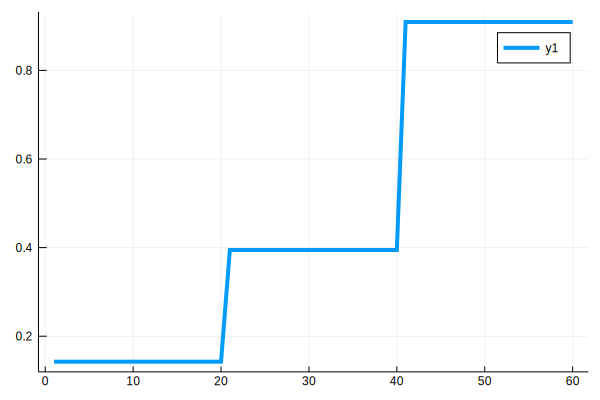

In [108]:
using Statistics,Distributions,RDatasets,DataFrames,Plots
df = dataset("datasets","ToothGrowth")
print(describe(df))
x = sort(df[!,:Dose])
d = fit(Normal,x)
gr()
plot(cdf.(d,x),lw=4)

## Continuous Distributions

- ### Exponential Distributions

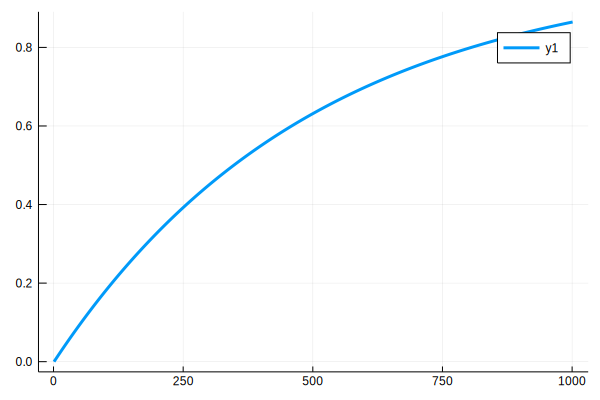

In [64]:
using Distributions
x = Array((0:1000))
d = fit(Exponential,x)
plot(cdf.(d,x),lw=3)

- ### Normal Distribution

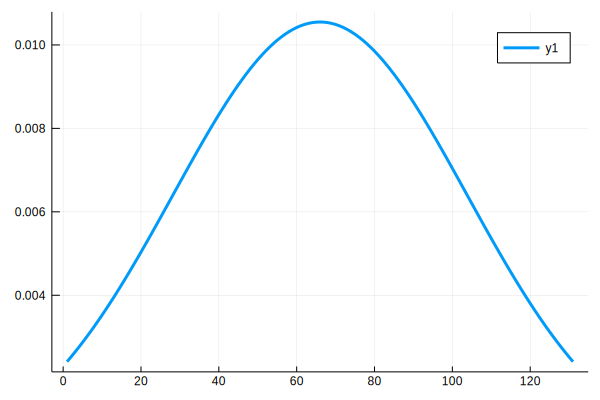

In [65]:
using Distributions
x = Array((-100:30))
d = fit(Normal,x)
plot(pdf.(d,x),lw=3)

- ### Binomial Distribution

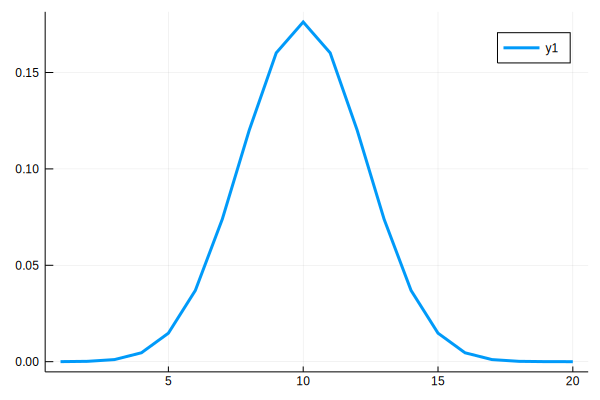

In [80]:
using Distributions
x = Array((1:20))
plot(pdf.(Binomial(20,0.5),x),lw=3)